<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Intro%20to%20Matplotlib/introduction_to_matplotlb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Create the data directory if it doesn't exist
!mkdir -p data

# Download the files using wget
!wget -O data/seattle_weather.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/seattle_weather.csv
!wget -O data/austin_weather.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/austin_weather.csv

In [19]:
# Load the dataset
seattle_weather = pd.read_csv("data/seattle_weather.csv")
austin_weather = pd.read_csv("data/austin_weather.csv")

In [26]:
# Convert the 'DATE' column to datetime objects
seattle_weather['DATE'] = pd.to_datetime(seattle_weather['DATE'], format='%m')
austin_weather['DATE'] = pd.to_datetime(austin_weather['DATE'], format='%m')

# Create the 'MONTH' column with month initials
seattle_weather['MONTH'] = seattle_weather['DATE'].dt.strftime('%b')
austin_weather['MONTH'] = austin_weather['DATE'].dt.strftime('%b')

In [29]:
# Group data by month and calculate the mean precipitation
seattle_monthly_avg = seattle_weather.groupby("MONTH")["MLY-PRCP-NORMAL"].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
austin_monthly_avg = austin_weather.groupby("MONTH")["MLY-PRCP-NORMAL"].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

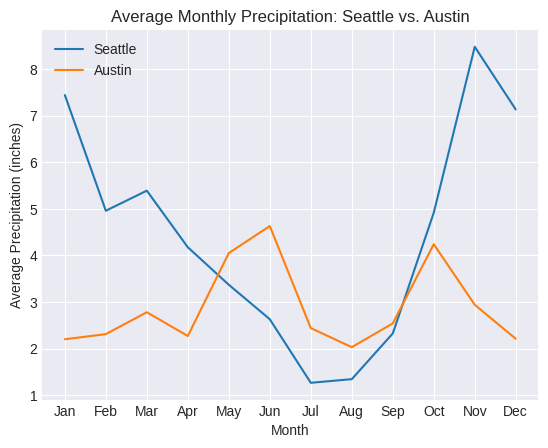

In [30]:
# Set default style
plt.style.use("seaborn-v0_8-darkgrid")
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot the monthly average precipitation
ax.plot(seattle_monthly_avg.index, seattle_monthly_avg.values, label='Seattle')
ax.plot(austin_monthly_avg.index, austin_monthly_avg.values, label='Austin')

# Add labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Average Precipitation (inches)")
ax.set_title("Average Monthly Precipitation: Seattle vs. Austin")
ax.legend()

# Call the show function
plt.show()